In [ ]:
#DATA COLLECTION!
#REading text files
def readTextFile(path):
    with open(path) as f:
        captions=f.read()
    return captions


In [ ]:
cd '/Users/anmolika/Downloads/archive/Flickr_Data/Flickr_Data/Flickr_TextData'


/Users/anmolika/Downloads/archive/Flickr_Data/Flickr_Data/Flickr_TextData


In [ ]:
pwd

'/Users/anmolika/Downloads/archive/Flickr_Data/Flickr_Data/Flickr_TextData'

In [ ]:
captions=readTextFile('Flickr8k.token.txt')
#len(captions.split("\n"))
#print(captions)
captions=captions.split('\n')
#image id , caption id ,(seprated by /t) caption

In [ ]:
captions[-1]

''

In [ ]:
first,second=captions[0].split('\t')
print(first.split(".")[0])#image id
print(first.split(".")[1])#caption id
print(second)# captions




1000268201_693b08cb0e
jpg#0
A child in a pink dress is climbing up a set of stairs in an entry way .


In [ ]:
# since last line is empty,we slice it using indexing
captions=captions[:-1]
len(captions)

40460

In [ ]:
# Dictionary to map each image to match list of captions it has
descriptions={}
for x in captions:
    first,second=x.split('\t')
    img_name=first.split(".")[0] # if the iamge id is already present or not
    if descriptions.get(img_name) is None:
        descriptions[img_name]=[]
    descriptions[img_name].append(second)
        
    
    

In [ ]:
descriptions["667626_18933d713e"]
# key is iamge id and value are captions
# 5 for each iamge

['A girl is stretched out in shallow water',
 'A girl wearing a red and multi-colored bikini is laying on her back in shallow water .',
 'A little girl in a red swimsuit is laying on her back in shallow water .',
 'A young girl is lying in the sand , while ocean water is surrounding her .',
 'Girl wearing a bikini lying on her back in a shallow pool of clear blue water .']

In [ ]:
!pip install opencv-python
import cv2

In [ ]:
import matplotlib.pyplot as plt

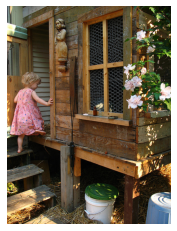

In [ ]:
#DATA CLEANING! 
IMG_PATH='/Users/anmolika/Downloads/archive/Flickr_Data/Flickr_Data/Images'


img=cv2.imread(IMG_PATH+"/1000268201_693b08cb0e.jpg")
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis("off")
plt.show()

In [ ]:
#now data cleaning starts
# now to feed data to the model 
# now project is about geenratring text
# donot remove stopwords kyui agar model ko a an the nahi bataoga to it would not generate correct english
# donot stem kyunki if u stem then model would learn stem only dog in run(dog is runnig)
# remove all posible number s,punctutation or any non alphabetical symbols(for reduction is vocab size)
# reducition in voacb size is imp input would be given output would be given toa ll words say this word has this much probablity(probablity dist aver entire vocab) desne layer with softmax less voac 
# less vocab size less neurons less parameters less overfitting less time computation

import re

In [ ]:
def clean_text(sentence):
    sentence=sentence.lower()
    sentence=re.sub("[^a-z]+"," ",sentence)
    sentence=sentence.split()
    
    sentence=[s for s in sentence if len(s)>1]# if u can sthis is done just to reduce vocab like  removing a etc u can also skip this process 
    sentence=" ".join(sentence)
    return sentence
    

In [ ]:
clean_text("A cat is sitting in house number # 64 a the an under above")# len(1)  wale containt se a is removed here as well as number 64

'cat is sitting in house number the an under above'

In [ ]:
# now lets clean all captions
for key,caption_list in descriptions.items():
    for i in range(len(caption_list)):
        caption_list[i]=clean_text(caption_list[i])

In [ ]:
descriptions["1000268201_693b08cb0e"]

['child in pink dress is climbing up set of stairs in an entry way',
 'girl going into wooden building',
 'little girl climbing into wooden playhouse',
 'little girl climbing the stairs to her playhouse',
 'little girl in pink dress going into wooden cabin']

In [ ]:
# see now all captions go clean captions
# write the data to text file to further use this data rather than doing it all over again
with open("descriptions_1.txt","w") as f:
    f.write(str(descriptions))
# this store ur dictionary in the form of a string u can alsoo and see description_1.txt g


In [ ]:
import json

In [ ]:
#VOCABULARY!!(set of all unique words ur model can prredict)
# why is it important 1.A 2.apple  as we will mapping words in vocab to choose the best one
descriptions=None
with open("descriptions_1.txt","r") as f:
    descriptions=f.read()
    #this is helpful as u can read data dircetly from where us stored rather than following alll the process u did above
    # very helpful to store data as such wehn dataste is large
json_acceptable_string=descriptions.replace("'","\"")
descriptions=json.loads(json_acceptable_string)
#above two line convert file in json format
#JSON stands for JavaScript Object Notation
#JSON format is used for serializing and transmitting structured data over network connection. It is primarily used to transmit data between a server and web applications. Web services and APIs use JSON format to provide public data. It can be used with modern programming languages.



In [ ]:
print(type(descriptions))

<class 'dict'>


In [ ]:
# VOCAB
vocab=set()
for key in descriptions.keys():
    [vocab.update(sentence.split()) for sentence in descriptions[key]]# [] signifies list comprehension
print("Vocab size : % d"% len(vocab))

Vocab size :  8424


In [ ]:
#vocab=set()
#vocab.update(["hello","apple"])
#vocab.update(["hello" ,"hi","Mango"])
#vocab.update(["hi"])
#print(vocab)

In [ ]:
# we are gonna remove very infrequent words that is words tletter than particular threshold frequency
total_words=[]
for key in descriptions.keys():
    [total_words.append(i) for des in descriptions[key] for i in des.split()]
print("total words %d "%len(total_words))
    

total words 373837 


In [ ]:
# descriptions[key] is a list [cap0 cap 1 ---]
# des is list of captions
# i is particular word in the particular caption
# so basically what we didi above was go to particular key see each caption get words and add it to total words list and move to next key
#total words 373837 
#Vocab size :  8424 unique words
print(total_words[:10])

['child', 'in', 'pink', 'dress', 'is', 'climbing', 'up', 'set', 'of', 'stairs']


In [ ]:
# now shortening the vocab by keeping most frequent words(filtering)
# say we  choose threshold of 10
import collections
counter=collections.Counter(total_words)# this would tell frequency count of each word
freq_cnt=dict(counter)
print(freq_cnt)

{'child': 1545, 'in': 18987, 'pink': 739, 'dress': 348, 'is': 9345, 'climbing': 507, 'up': 1302, 'set': 109, 'of': 6723, 'stairs': 109, 'an': 2432, 'entry': 1, 'way': 53, 'girl': 3328, 'going': 149, 'into': 1074, 'wooden': 284, 'building': 511, 'little': 1768, 'playhouse': 6, 'the': 18420, 'to': 3176, 'her': 1178, 'cabin': 4, 'black': 3848, 'dog': 8138, 'and': 8863, 'spotted': 38, 'are': 3505, 'fighting': 133, 'tri': 14, 'colored': 221, 'playing': 2008, 'with': 7765, 'each': 430, 'other': 773, 'on': 10746, 'road': 398, 'white': 3959, 'brown': 2578, 'spots': 29, 'staring': 57, 'at': 2916, 'street': 944, 'two': 5643, 'dogs': 2125, 'different': 46, 'breeds': 5, 'looking': 744, 'pavement': 48, 'moving': 41, 'toward': 146, 'covered': 372, 'paint': 62, 'sits': 577, 'front': 1386, 'painted': 64, 'rainbow': 22, 'hands': 246, 'bowl': 30, 'sitting': 1368, 'large': 1237, 'small': 1278, 'grass': 1622, 'plays': 526, 'fingerpaints': 3, 'canvas': 6, 'it': 401, 'there': 304, 'pigtails': 14, 'painting'

In [ ]:
print(len(freq_cnt.keys()))

8424


In [ ]:
print(len(total_words))

373837


In [ ]:
# sort this dictionary according to frequency count
sorted_freq_cnt=sorted(freq_cnt.items(),reverse=True,key=lambda x:x[1])
#sorted function operates on a list
# x:x[1] a:20 b:30
# filter 
threshold=10
sorted_freq_cnt=[x for x in sorted_freq_cnt if x[1]>threshold]
total_words=[x[0] for x in sorted_freq_cnt]

In [ ]:
total_words

['in',
 'the',
 'on',
 'is',
 'and',
 'dog',
 'with',
 'man',
 'of',
 'two',
 'white',
 'black',
 'boy',
 'are',
 'woman',
 'girl',
 'to',
 'wearing',
 'at',
 'people',
 'water',
 'red',
 'young',
 'brown',
 'an',
 'his',
 'blue',
 'dogs',
 'running',
 'through',
 'playing',
 'while',
 'shirt',
 'down',
 'standing',
 'ball',
 'little',
 'grass',
 'snow',
 'child',
 'person',
 'jumping',
 'over',
 'three',
 'front',
 'sitting',
 'holding',
 'up',
 'field',
 'small',
 'by',
 'large',
 'green',
 'one',
 'group',
 'yellow',
 'her',
 'walking',
 'children',
 'men',
 'into',
 'air',
 'beach',
 'near',
 'mouth',
 'jumps',
 'another',
 'for',
 'street',
 'runs',
 'its',
 'from',
 'riding',
 'stands',
 'as',
 'bike',
 'girls',
 'outside',
 'other',
 'off',
 'out',
 'rock',
 'next',
 'play',
 'orange',
 'looking',
 'pink',
 'player',
 'camera',
 'their',
 'pool',
 'hat',
 'jacket',
 'boys',
 'women',
 'around',
 'behind',
 'some',
 'background',
 'dirt',
 'toy',
 'soccer',
 'sits',
 'dressed',
 

In [ ]:
print(len(total_words))
# 1845 would be final vocab size by filtering

1845


In [ ]:
#prepare t-rain/test data
train_file_data=readTextFile("/Users/anmolika/Downloads/archive/Flickr_Data/Flickr_Data/Flickr_TextData/Flickr_8k.trainImages.txt")
test_file_data=readTextFile("/Users/anmolika/Downloads/archive/Flickr_Data/Flickr_Data/Flickr_TextData/Flickr_8k.testImages.txt")

In [ ]:
print(train_file_data)

2513260012_03d33305cf.jpg
2903617548_d3e38d7f88.jpg
3338291921_fe7ae0c8f8.jpg
488416045_1c6d903fe0.jpg
2644326817_8f45080b87.jpg
218342358_1755a9cce1.jpg
2501968935_02f2cd8079.jpg
2699342860_5288e203ea.jpg
2638369467_8fc251595b.jpg
2926786902_815a99a154.jpg
2851304910_b5721199bc.jpg
3423802527_94bd2b23b0.jpg
3356369156_074750c6cc.jpg
2294598473_40637b5c04.jpg
1191338263_a4fa073154.jpg
2380765956_6313d8cae3.jpg
3197891333_b1b0fd1702.jpg
3119887967_271a097464.jpg
2276499757_b44dc6f8ce.jpg
2506892928_7e79bec613.jpg
2187222896_c206d63396.jpg
2826769554_85c90864c9.jpg
3097196395_ec06075389.jpg
3603116579_4a28a932e2.jpg
3339263085_6db9fd0981.jpg
2532262109_87429a2cae.jpg
2076906555_c20dc082db.jpg
2502007071_82a8c639cf.jpg
3113769557_9edbb8275c.jpg
3325974730_3ee192e4ff.jpg
1655781989_b15ab4cbff.jpg
1662261486_db967930de.jpg
2410562803_56ec09f41c.jpg
2469498117_b4543e1460.jpg
69710415_5c2bfb1058.jpg
3414734842_beb543f400.jpg
3006217970_90b42e6b27.jpg
2192411521_9c7e488c5e.jpg
3535879138_9281d

In [ ]:
train=[row.split(".")[0] for row in train_file_data.split("\n")[:-1]]
test=[row.split(".")[0] for row in test_file_data.split("\n")[:-1]]


In [ ]:
train[:10]

['2513260012_03d33305cf',
 '2903617548_d3e38d7f88',
 '3338291921_fe7ae0c8f8',
 '488416045_1c6d903fe0',
 '2644326817_8f45080b87',
 '218342358_1755a9cce1',
 '2501968935_02f2cd8079',
 '2699342860_5288e203ea',
 '2638369467_8fc251595b',
 '2926786902_815a99a154']

In [ ]:
#prepare the descri[tions for training data
# text geenration would be done using lstm model
#start token and end token to recognize starting and ending of caption
# tweak- add <s> and <e> token to our training data
train_descriptions={}
for img_id in train:
    train_descriptions[img_id]=[]
    for cap in descriptions[img_id]:
        cap_to_append="startseq " + cap + " endseq"
        train_descriptions[img_id].append(cap_to_append)

In [ ]:
train_descriptions["1000268201_693b08cb0e"]

['startseq child in pink dress is climbing up set of stairs in an entry way endseq',
 'startseq girl going into wooden building endseq',
 'startseq little girl climbing into wooden playhouse endseq',
 'startseq little girl climbing the stairs to her playhouse endseq',
 'startseq little girl in pink dress going into wooden cabin endseq']

In [ ]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
#import tensorflow as tf 
#import os
#from tensorflow.python.keras.applications.resnet import ResNet50
#from keras.applications.resnet50 import ResNet50
#from keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import ResNet50

In [ ]:
pip install -U tensorflow

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from tensorflow import keras 
import numpy as np

In [ ]:
#TRANSFER LEARNINF
#IMAGES -> FEATURES
#TEXT--> FEATURES
# for image processing we use a prre trained model 
# restnet 50 which is pretrained on imagenet
# 50 layers and skip connections(donot suufeer from gradient descent)
model=ResNet50(weights="imagenet",input_shape=(224,224,3))
model.summary()


Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

                                                                                                  
 conv2_block3_1_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_2_conv (Conv2D)   (None, 56, 56, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv3_block3_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_2_conv (Conv2D)   (None, 28, 28, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv4_block2_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_2_conv[0][0]']    
 ization) 

 conv4_block5_1_conv (Conv2D)   (None, 14, 14, 256)  262400      ['conv4_block4_out[0][0]']       
                                                                                                  
 conv4_block5_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block5_1_relu[0][0]']    
                                                                                                  
 conv4_blo

                                                                  'conv5_block1_3_bn[0][0]']      
                                                                                                  
 conv5_block1_out (Activation)  (None, 7, 7, 2048)   0           ['conv5_block1_add[0][0]']       
                                                                                                  
 conv5_block2_1_conv (Conv2D)   (None, 7, 7, 512)    1049088     ['conv5_block1_out[0][0]']       
                                                                                                  
 conv5_block2_1_bn (BatchNormal  (None, 7, 7, 512)   2048        ['conv5_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_1_relu (Activatio  (None, 7, 7, 512)   0           ['conv5_block2_1_bn[0][0]']      
 n)       

In [ ]:
model.layers[-2].output

<KerasTensor: shape=(None, 2048) dtype=float32 (created by layer 'avg_pool')>

In [ ]:
import tensorflow.compat.v1.keras.backend as K
import tensorflow as tf
tf.compat.v1.disable_eager_execution()

In [ ]:
# connected to is there as there is skip connections is also there
# this model will aloow to u extract feature
# now usingfunctional api
model_new=model(model.input,model.layers[-2].output)


TypeError: Exception encountered when calling layer "conv1_bn" (type BatchNormalization).

Tensors are unhashable (this tensor: KerasTensor(type_spec=TensorSpec(shape=(None, 2048), dtype=tf.float32, name=None), name='avg_pool/Mean:0', description="created by layer 'avg_pool'")). Instead, use tensor.ref() as the key.

Call arguments received:
  • inputs=tf.Tensor(shape=(None, 112, 112, 64), dtype=float32)
  • training=<KerasTensor: shape=(None, 2048) dtype=float32 (created by layer 'avg_pool')>

In [ ]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import save_img
from keras.preprocessing.image import img_to_array
from keras.applications.imagenet_utils import preprocess_input

def preprocess_img(img):
    img=load_img(img,target_size=(224,224))
    img=img_to_array(img)
    img=np.expand_dims(img,axis=0)
    
    #Normalisation
    img=preprocess_input(img)
    return img

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


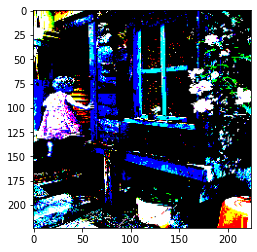

In [ ]:
img=preprocess_img(IMG_PATH+"/1000268201_693b08cb0e.jpg")
plt.imshow(img[0])
plt.show()



In [ ]:
import pandas 


In [ ]:
def encode_image(img):
    img=preprocess_img(img)
    feature_vector=model_new.predict(img)
    feature_vector=feature_vector.reshape((-1,)) #reshape your feature vector
    print(feature_vector.shape)
    return feature_vector

In [ ]:
encode_image(IMG_PATH+"/1000268201_693b08cb0e.jpg")

AttributeError: 'Tensor' object has no attribute 'predict'